
# Project 1

# Wine Quality Prediction

#### Name-Tanu Srivastav


#### Importing Packages

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

#### Reading Datasets

In [13]:
dataset = pd.read_csv(r'C:\Users\ys474\OneDrive\Desktop\wine quality.csv')

In [14]:
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [15]:
print(dataset.shape)

(1599, 12)


In [16]:
print(dataset.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [17]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [18]:
#Let's check if we have any duplicate rows

duplicate_rows_df = dataset[dataset.duplicated()]
print("Number of duplicate rows: ", duplicate_rows_df.shape )

Number of duplicate rows:  (240, 12)


In [19]:
#Now we drop the duplicate rows

dataset = dataset.drop_duplicates()
print(dataset.shape)

(1359, 12)


In [20]:
#Let's check the number again 

duplicate_rows_df = dataset[dataset.duplicated()]
print("Number of duplicate rows: ", duplicate_rows_df.shape )

Number of duplicate rows:  (0, 12)


In [21]:
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

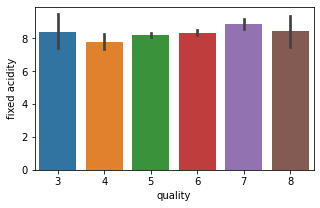

In [22]:
fig = plt.figure(figsize = (5,3))
sns.barplot(x = 'quality', y = 'fixed acidity', data = dataset)
#Here we see that fixed acidity does not give any specification to classify the quality.

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

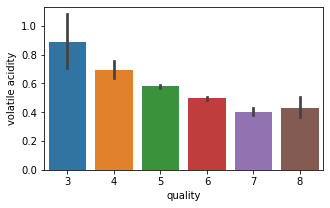

In [23]:
fig = plt.figure(figsize = (5,3))
sns.barplot(x = 'quality', y = 'volatile acidity', data = dataset)
#Here we see that higher quality wine has lower volatile acidity

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

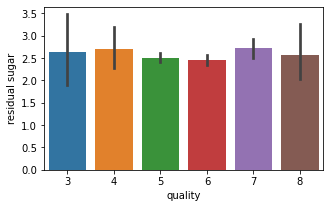

In [24]:
fig = plt.figure(figsize = (5,3))
sns.barplot(x = 'quality', y = 'residual sugar', data = dataset)
# Residual Sugar does not have a significant effect on the quality of wine

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

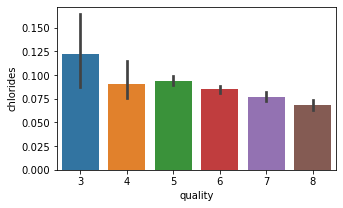

In [25]:
fig = plt.figure(figsize = (5,3))
sns.barplot(x = 'quality', y = 'chlorides', data = dataset)
#Composition of chloride also go down as we go higher in the quality of the wine

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

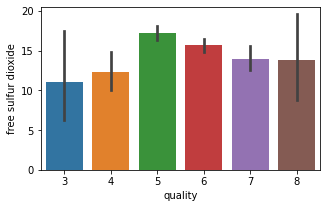

In [26]:
fig = plt.figure(figsize = (5,3))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = dataset)

<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

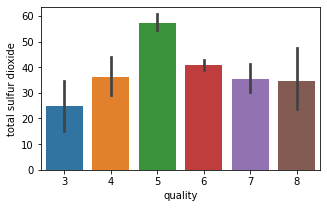

In [27]:
fig = plt.figure(figsize = (5,3))
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = dataset)


<AxesSubplot:xlabel='quality', ylabel='sulphates'>

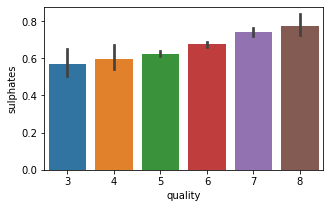

In [28]:
fig = plt.figure(figsize = (5,3))
sns.barplot(x = 'quality', y = 'sulphates', data = dataset)
#Sulphates level goes higher with the quality of wine

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

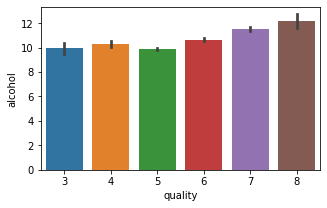

In [29]:
fig = plt.figure(figsize = (5,3))
sns.barplot(x = 'quality', y = 'alcohol', data = dataset)
#Alcohol level also goes higher as te quality of wine increases

<AxesSubplot:>

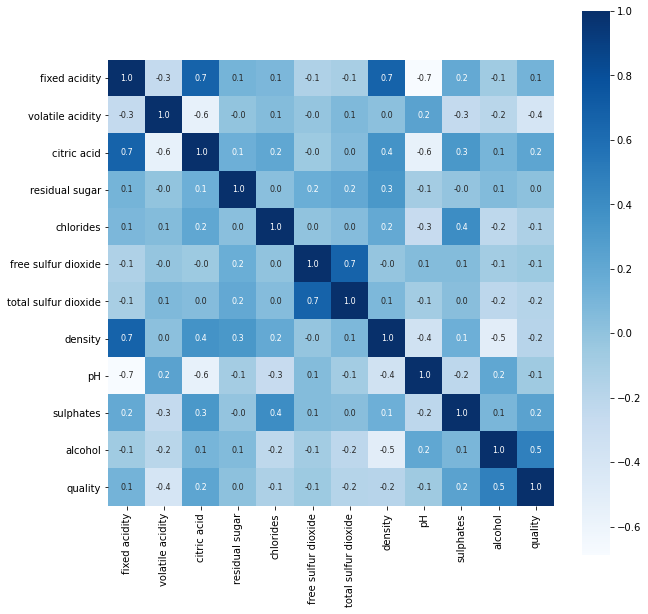

In [30]:
plt.subplots(figsize=(10,10))
sns.heatmap(dataset.corr(), cbar=True, square=True, fmt='.1f', annot=True, annot_kws = {'size':8}, cmap='Blues')

In [31]:
print(dataset['quality'].value_counts())

5    577
6    535
7    167
4     53
8     17
3     10
Name: quality, dtype: int64


<AxesSubplot:xlabel='quality', ylabel='count'>

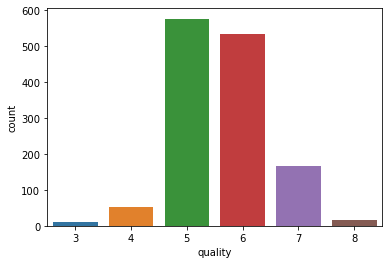

In [32]:
sns.countplot(x=dataset['quality'])

In [33]:
def cat(x):
    if x < 6.5:
        return 'poor'
    else:
        return 'good'
dataset['quality']=dataset['quality'].apply(lambda x: cat(x))
#assuming that the quality below 6 is not up to the mark and above 6 is good

In [34]:
print(dataset['quality'].value_counts())

poor    1175
good     184
Name: quality, dtype: int64


C:\Users\ys474\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='count'>

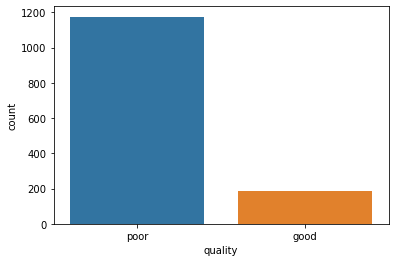

In [35]:
sns.countplot(dataset['quality'])

In [37]:
#Now lets assign a labels to our quality variable
label_quality = LabelEncoder()
#poor becomes 1 and good becomes 0 
dataset['quality'] = label_quality.fit_transform(dataset['quality'])

In [38]:
print(dataset['quality'].value_counts())

1    1175
0     184
Name: quality, dtype: int64


In [39]:
# Extracting independent and dependent variables

x = dataset.drop(['quality'], axis=1)
y = dataset['quality']

In [40]:
sc = StandardScaler()
x = sc.fit_transform(x)

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(x_train.shape, x_test.shape)

(1087, 11) (272, 11)


In [42]:
def fit_predict(model1):
    model = model1
    model.fit(x_train, y_train)
    y_pred=model.predict(x_test)
    print("Accuracy score: ",(accuracy_score(y_test, y_pred)*100))
    print("\nConfusion Matirx")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification report")
    print(classification_report(y_test,y_pred))

# Logistic Regression 

In [43]:
from sklearn.linear_model import LogisticRegression
fit_predict(LogisticRegression())

Accuracy score:  89.33823529411765

Confusion Matirx
[[ 13  21]
 [  8 230]]

Classification report
              precision    recall  f1-score   support

           0       0.62      0.38      0.47        34
           1       0.92      0.97      0.94       238

    accuracy                           0.89       272
   macro avg       0.77      0.67      0.71       272
weighted avg       0.88      0.89      0.88       272



# Knn

In [44]:
from sklearn.neighbors import KNeighborsClassifier
fit_predict(KNeighborsClassifier(n_neighbors=7))

Accuracy score:  90.07352941176471

Confusion Matirx
[[ 17  17]
 [ 10 228]]

Classification report
              precision    recall  f1-score   support

           0       0.63      0.50      0.56        34
           1       0.93      0.96      0.94       238

    accuracy                           0.90       272
   macro avg       0.78      0.73      0.75       272
weighted avg       0.89      0.90      0.90       272



## Decision Tree

In [45]:
from sklearn.tree import DecisionTreeClassifier
fit_predict(DecisionTreeClassifier(max_depth=2))

Accuracy score:  90.80882352941177

Confusion Matirx
[[ 20  14]
 [ 11 227]]

Classification report
              precision    recall  f1-score   support

           0       0.65      0.59      0.62        34
           1       0.94      0.95      0.95       238

    accuracy                           0.91       272
   macro avg       0.79      0.77      0.78       272
weighted avg       0.90      0.91      0.91       272



# Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier
fit_predict(RandomForestClassifier(n_estimators=200, random_state=0))

Accuracy score:  91.54411764705883

Confusion Matirx
[[ 14  20]
 [  3 235]]

Classification report
              precision    recall  f1-score   support

           0       0.82      0.41      0.55        34
           1       0.92      0.99      0.95       238

    accuracy                           0.92       272
   macro avg       0.87      0.70      0.75       272
weighted avg       0.91      0.92      0.90       272



# Support Vector Classifier

In [47]:
from sklearn.svm import SVC
fit_predict(SVC())

Accuracy score:  91.91176470588235

Confusion Matirx
[[ 15  19]
 [  3 235]]

Classification report
              precision    recall  f1-score   support

           0       0.83      0.44      0.58        34
           1       0.93      0.99      0.96       238

    accuracy                           0.92       272
   macro avg       0.88      0.71      0.77       272
weighted avg       0.91      0.92      0.91       272



###### As we can see above different classification algorithms provide different results, out of which support vector has the higgest accuracy, i.e., 91.91%. Hence, we will be using SVC to make predictions.

## Creating a test case

In [49]:
model = SVC()                                             
model.fit(x_train, y_train)

#creating a list of random values for chemical compositions of wine
test_case_list = [7.4, 0.36, 0.3, 1.8, 0.074, 17, 24, 0.99419, 3.24, 0.7, 13.4]

# converting the list into a dataframe
test_case_df = pd.DataFrame(test_case_list)  

# the shape of current df is (11,1) and the required shape is (1,11)
test_case = test_case_df.T      

# applying standard scaler to the test case
test_case_scaled = sc.transform(test_case)   

# predicting the quality for test case
test_case_prediction = model.predict(test_case_scaled)  

# generating the result
if(test_case_prediction == 0):                            
    print('The Quality of wine is good.')
else:
    print('The Quality of wine is not up to the mark.')

The Quality of wine is good.
